# View Crime data

Some basic visulisations of the MPS crime data

In [3]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [48]:
df = pd.read_pickle("mps.borough.crime.2010-2021.pickle")
df

,index,MajorText,MinorText,LookUp_BoroughName,yearmonth,value,date
0,37128,Arson and Criminal Damage,Arson,Barking and Dagenham,201004,6,2010-04-01
1,37129,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,201004,208,2010-04-01
2,37130,Burglary,Burglary Business and Community,Barking and Dagenham,201004,49,2010-04-01
3,37131,Burglary,Domestic Burglary,Barking and Dagenham,201004,118,2010-04-01
4,37132,Drug Offences,Drug Trafficking,Barking and Dagenham,201004,9,2010-04-01
...,...,...,...,...,...,...,...
243403,37123,Vehicle Offences,Theft from a Motor Vehicle,Westminster,202203,290,2022-03-01
243404,37124,Vehicle Offences,Theft or Taking of a Motor Vehicle,Westminster,202203,51,2022-03-01
243405,37125,Violence Against the Person,Homicide,Westminster,202203,0,2022-03-01
243406,37126,Violence Against the Person,Violence with Injury,Westminster,202203,347,2022-03-01


In [49]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

In [50]:
df

,index,MajorText,MinorText,LookUp_BoroughName,yearmonth,value,date,month,year
0,37128,Arson and Criminal Damage,Arson,Barking and Dagenham,201004,6,2010-04-01,4,2010
1,37129,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,201004,208,2010-04-01,4,2010
2,37130,Burglary,Burglary Business and Community,Barking and Dagenham,201004,49,2010-04-01,4,2010
3,37131,Burglary,Domestic Burglary,Barking and Dagenham,201004,118,2010-04-01,4,2010
4,37132,Drug Offences,Drug Trafficking,Barking and Dagenham,201004,9,2010-04-01,4,2010
...,...,...,...,...,...,...,...,...,...
243403,37123,Vehicle Offences,Theft from a Motor Vehicle,Westminster,202203,290,2022-03-01,3,2022
243404,37124,Vehicle Offences,Theft or Taking of a Motor Vehicle,Westminster,202203,51,2022-03-01,3,2022
243405,37125,Violence Against the Person,Homicide,Westminster,202203,0,2022-03-01,3,2022
243406,37126,Violence Against the Person,Violence with Injury,Westminster,202203,347,2022-03-01,3,2022


Aggregate (sum) Public Order Offences by borough, month and year

In [51]:
sdf = df[df.MajorText == 'Public Order Offences'].groupby(['MajorText', 'LookUp_BoroughName', 'year', 'month']).sum().reset_index()
sdf

,MajorText,LookUp_BoroughName,year,month,index,value
0,Public Order Offences,Barking and Dagenham,2010,4,148650,50
1,Public Order Offences,Barking and Dagenham,2010,5,155526,56
2,Public Order Offences,Barking and Dagenham,2010,6,162402,58
3,Public Order Offences,Barking and Dagenham,2010,7,169278,48
4,Public Order Offences,Barking and Dagenham,2010,8,176154,50
...,...,...,...,...,...,...
4747,Public Order Offences,Westminster,2021,11,123690,298
4748,Public Order Offences,Westminster,2021,12,129878,293
4749,Public Order Offences,Westminster,2022,1,136066,241
4750,Public Order Offences,Westminster,2022,2,142254,294


<AxesSubplot:xlabel='month', ylabel='value'>

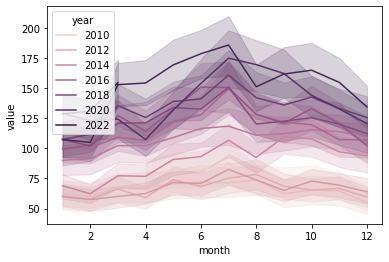

In [57]:
sns.lineplot(data=sdf, hue='year', y='value', x='month')

Plot the annual cycle for different boroughs with years as coloured lines:

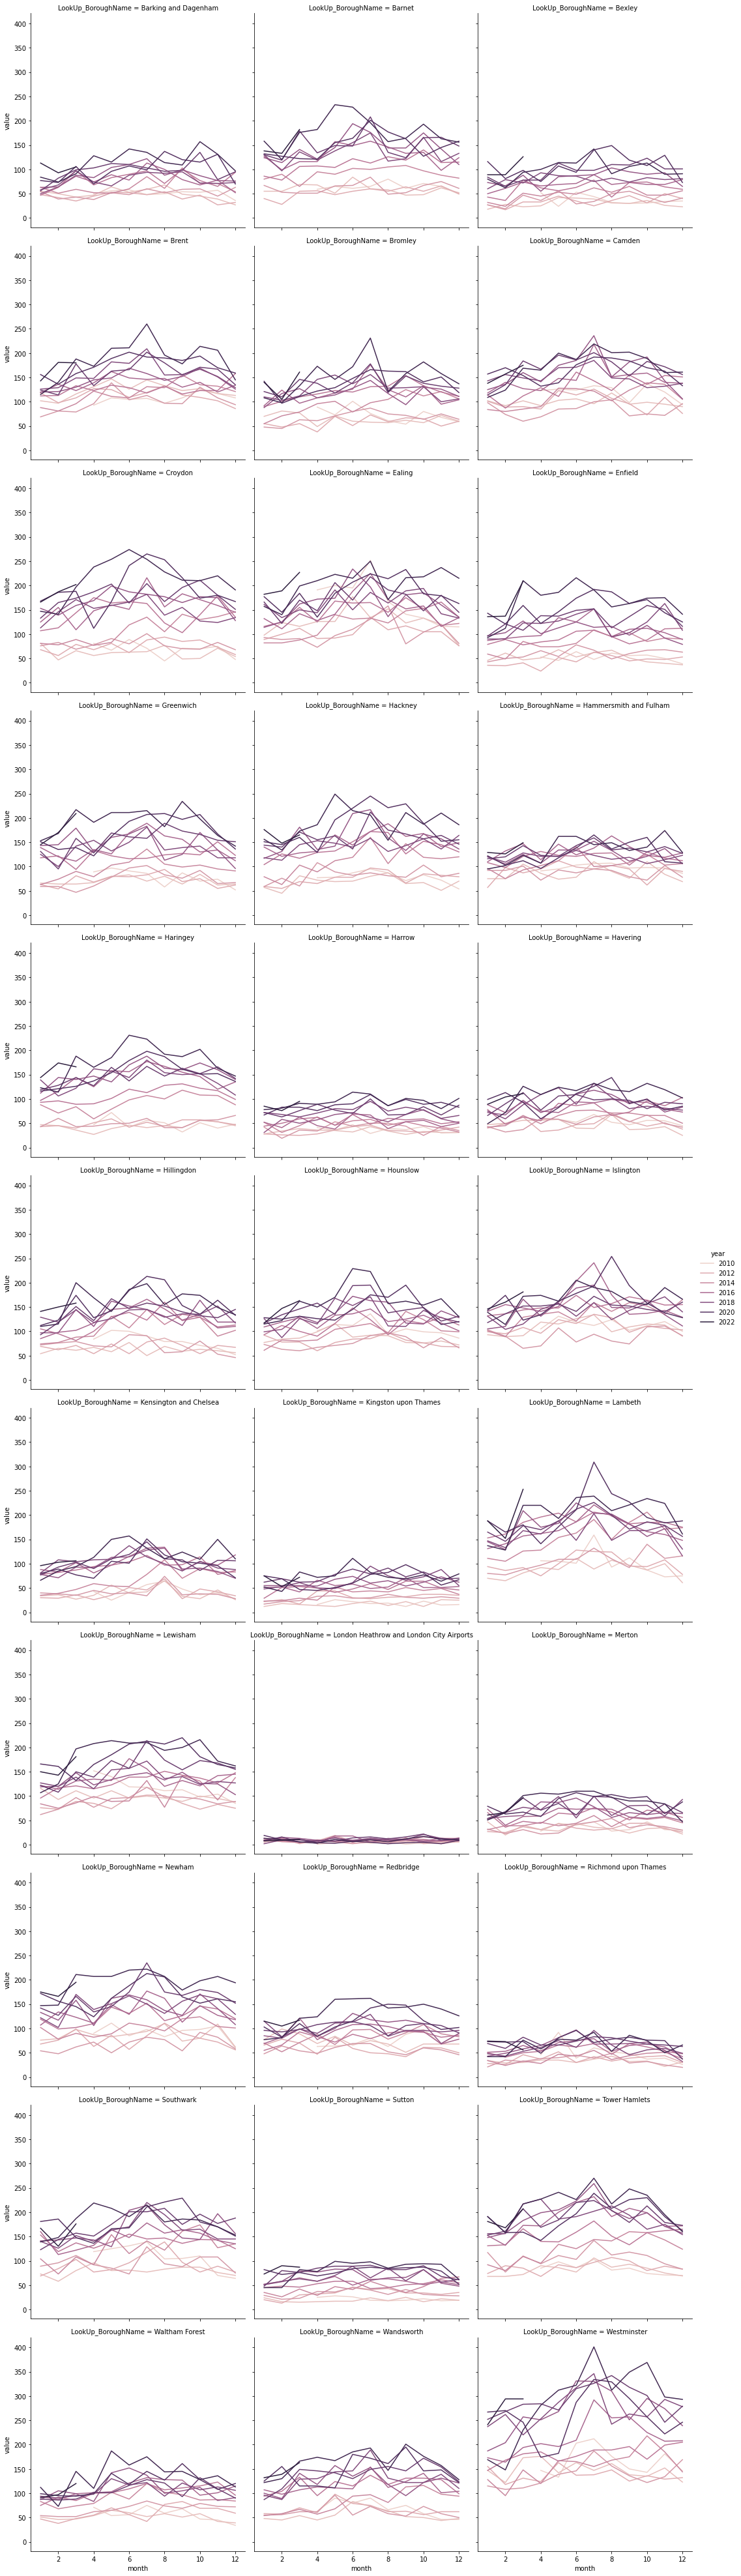

In [63]:
sns.relplot(
    data=sdf, x="month", y="value", hue="year",
    col="LookUp_BoroughName", col_wrap=3,
    kind="line"
)

Plot the year on year totals for each month with different boroughs in coloured lines:

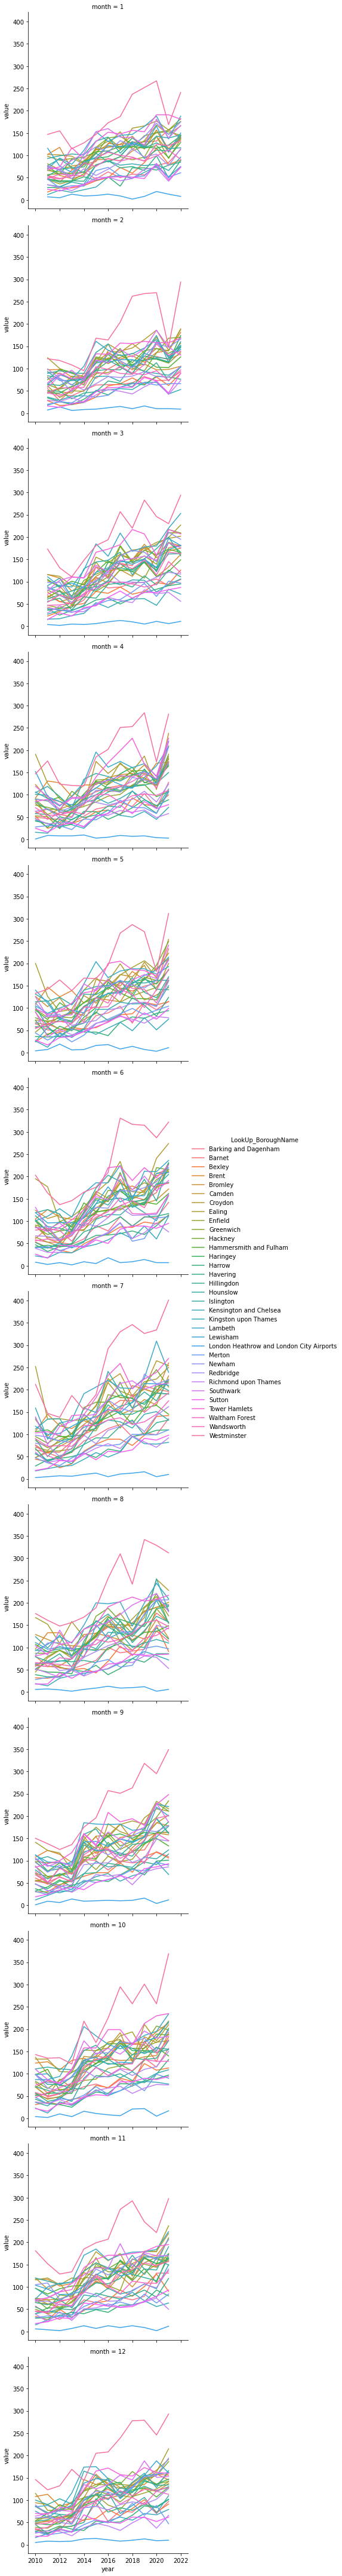

In [64]:
sns.relplot(
    data=sdf, x="year", y="value", hue="LookUp_BoroughName",
    row="month",
    kind="line"
)